# DATASET INFORMATION

There are 38 classes of plant disease images which contains 70295 images in training set and 17572 in valid set.

Each class contains average of 1700-1800 number of images to work upon.

Each image is of size= (256,256,3).

# Step 1: Importing the dataset

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import os
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential,load_model,Model
from keras.layers import Conv2D,MaxPool2D,AveragePooling2D,Dense,Flatten,ZeroPadding2D,BatchNormalization,Activation,Add,Input,Dropout,GlobalAveragePooling2D
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.layers import LeakyReLU

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (3).json


{'kaggle (3).json': b'{"username":"shwetha1601","key":"e8e9990dad4114273fb8cec8f6611146"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

new-plant-diseases-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls

 data		 'kaggle (1).json'   new-plant-diseases-dataset.zip
 DCNN_model1.h5   kaggle.json	     sample_data


In [ ]:
import zipfile
path='data/plant'
with zipfile.ZipFile('new-plant-diseases-dataset.zip','r') as z:
  z.extractall(path)

In [ ]:
!ls "/content/data"

plant


In [ ]:
!ls "/content/data/plant/New Plant Diseases Dataset(Augmented)"

'New Plant Diseases Dataset(Augmented)'


In [ ]:
!ls "/content/data/plant/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"

 Apple___Apple_scab
 Apple___Black_rot
 Apple___Cedar_apple_rust
 Apple___healthy
 Blueberry___healthy
'Cherry_(including_sour)___healthy'
'Cherry_(including_sour)___Powdery_mildew'
'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot'
'Corn_(maize)___Common_rust_'
'Corn_(maize)___healthy'
'Corn_(maize)___Northern_Leaf_Blight'
 Grape___Black_rot
'Grape___Esca_(Black_Measles)'
 Grape___healthy
'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)'
'Orange___Haunglongbing_(Citrus_greening)'
 Peach___Bacterial_spot
 Peach___healthy
 Pepper,_bell___Bacterial_spot
 Pepper,_bell___healthy
 Potato___Early_blight
 Potato___healthy
 Potato___Late_blight
 Raspberry___healthy
 Soybean___healthy
 Squash___Powdery_mildew
 Strawberry___healthy
 Strawberry___Leaf_scorch
 Tomato___Bacterial_spot
 Tomato___Early_blight
 Tomato___healthy
 Tomato___Late_blight
 Tomato___Leaf_Mold
 Tomato___Septoria_leaf_spot
'Tomato___Spider_mites Two-spotted_spider_mite'
 Tomato___Target_Spot
 Tomato___Tomato_mosaic_virus
 Tomato_

In [ ]:
!ls "/content/data/plant/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"

 Apple___Apple_scab
 Apple___Black_rot
 Apple___Cedar_apple_rust
 Apple___healthy
 Blueberry___healthy
'Cherry_(including_sour)___healthy'
'Cherry_(including_sour)___Powdery_mildew'
'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot'
'Corn_(maize)___Common_rust_'
'Corn_(maize)___healthy'
'Corn_(maize)___Northern_Leaf_Blight'
 Grape___Black_rot
'Grape___Esca_(Black_Measles)'
 Grape___healthy
'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)'
'Orange___Haunglongbing_(Citrus_greening)'
 Peach___Bacterial_spot
 Peach___healthy
 Pepper,_bell___Bacterial_spot
 Pepper,_bell___healthy
 Potato___Early_blight
 Potato___healthy
 Potato___Late_blight
 Raspberry___healthy
 Soybean___healthy
 Squash___Powdery_mildew
 Strawberry___healthy
 Strawberry___Leaf_scorch
 Tomato___Bacterial_spot
 Tomato___Early_blight
 Tomato___healthy
 Tomato___Late_blight
 Tomato___Leaf_Mold
 Tomato___Septoria_leaf_spot
'Tomato___Spider_mites Two-spotted_spider_mite'
 Tomato___Target_Spot
 Tomato___Tomato_mosaic_virus
 Tomato_

# Loading the dataset

In [ ]:
data_dir_whole= "/content/data/plant/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)"
train_dir_whole = data_dir_whole + "/train"
valid_dir_whole = data_dir_whole + "/valid"
diseases = os.listdir(train_dir_whole )

## Modifying the dataset and deleting directories to get the plants to be worked on - APPLE, POTATO, CHERRY, CORN, GRAPES, and TOMATOES

In [ ]:
import glob
import shutil

In [ ]:
# Defining the directories
train_dir_whole = "/content/data/plant/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
valid_dir_whole = "/content/data/plant/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"

In [ ]:
# List of directories to delete
folders_to_delete = [
    glob.glob(train_dir_whole + "/Blueberry___healthy") + glob.glob(valid_dir_whole + "/Blueberry___healthy"),
    glob.glob(train_dir_whole + "/Orange___Haunglongbing_(Citrus_greening)") + glob.glob(valid_dir_whole + "/Orange___Haunglongbing_(Citrus_greening)"),
    glob.glob(train_dir_whole + "/Peach___Bacterial_spot") + glob.glob(valid_dir_whole + "/Peach___Bacterial_spot"),
    glob.glob(train_dir_whole + "/Peach___healthy") + glob.glob(valid_dir_whole + "/Peach___healthy"),
    glob.glob(train_dir_whole + "/Pepper,_bell___Bacterial_spot") + glob.glob(valid_dir_whole + "/Pepper,_bell___Bacterial_spot"),
    glob.glob(train_dir_whole + "/Pepper,_bell___healthy") + glob.glob(valid_dir_whole + "/Pepper,_bell___healthy"),
    glob.glob(train_dir_whole + "/Raspberry___healthy") + glob.glob(valid_dir_whole + "/Raspberry___healthy"),
    glob.glob(train_dir_whole + "/Soybean___healthy") + glob.glob(valid_dir_whole + "/Soybean___healthy"),
    glob.glob(train_dir_whole + "/Squash___Powdery_mildew") + glob.glob(valid_dir_whole + "/Squash___Powdery_mildew"),
    glob.glob(train_dir_whole + "/Strawberry___Leaf_scorch") + glob.glob(valid_dir_whole + "/Strawberry___Leaf_scorch"),
    glob.glob(train_dir_whole + "/Strawberry___healthy") + glob.glob(valid_dir_whole + "/Strawberry___healthy")
]


In [ ]:
# Flattening the list of directories
folders_to_delete = [item for sublist in folders_to_delete for item in sublist]

In [ ]:
# List to store deleted directories
deleted_directories = []

# Deleting the directories and storing the deleted directories to check
for folder in folders_to_delete:
    try:
        shutil.rmtree(folder)
        deleted_directories.append(folder)
        print(f"Deleted folder: {folder}")
    except Exception as e:
        print(f"Failed to delete folder {folder}: {e}")


In [ ]:
# Print the list of deleted directories
print("List of deleted directories:")
for directory in deleted_directories:
    print(directory)

List of deleted directories:
/content/data/plant/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Blueberry___healthy
/content/data/plant/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Blueberry___healthy
/content/data/plant/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Orange___Haunglongbing_(Citrus_greening)
/content/data/plant/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Orange___Haunglongbing_(Citrus_greening)
/content/data/plant/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Peach___Bacterial_spot
/content/data/plant/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Peach___Bacterial_spot
/content/data/plant/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Peach___healthy
/content/data/plant/New Plant Diseases Dataset(Augmented)/New Plant Disea

In [ ]:
# Print the list of directories in train_dir_whole after deletion
directories_in_train_dir = os.listdir(train_dir_whole)

print("List of directories in train_dir_whole:")
for directory in directories_in_train_dir:
    print(directory)

List of directories in train_dir_whole:
Tomato___Tomato_Yellow_Leaf_Curl_Virus
Tomato___Septoria_leaf_spot
Grape___Black_rot
Tomato___Early_blight
Tomato___Leaf_Mold
Apple___Black_rot
Tomato___Target_Spot
Corn_(maize)___healthy
Corn_(maize)___Northern_Leaf_Blight
Tomato___healthy
Corn_(maize)___Common_rust_
Apple___Cedar_apple_rust
Tomato___Tomato_mosaic_virus
Cherry_(including_sour)___healthy
Grape___healthy
Cherry_(including_sour)___Powdery_mildew
Grape___Esca_(Black_Measles)
Tomato___Spider_mites Two-spotted_spider_mite
Tomato___Late_blight
Tomato___Bacterial_spot
Apple___Apple_scab
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
Potato___Early_blight
Potato___healthy
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
Potato___Late_blight
Apple___healthy


### Defining the input layer

In [ ]:
pt = Input(shape=(256, 256, 3))

### Defining the data generators

In [ ]:
train_datagen = ImageDataGenerator(
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode='nearest',
    width_shift_range=0.2,
    height_shift_range=0.2
)

val_datagen = ImageDataGenerator()

# Set batch size
batch_size = 32

train_generator = train_datagen.flow_from_directory(
    directory=train_dir_whole,
    batch_size=batch_size,
    target_size=(256, 256),
    color_mode='rgb',
    class_mode='categorical',
    seed=42
)

valid_generator = val_datagen.flow_from_directory(
    directory=valid_dir_whole,
    batch_size=batch_size,
    target_size=(256, 256),
    color_mode='rgb',
    class_mode='categorical'
)


Found 49865 images belonging to 27 classes.
Found 12465 images belonging to 27 classes.


### Building model 1

In [ ]:
x = pt

In [ ]:
# Define and compile the model
model = Sequential()

# Convolutional layers with max pooling
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten layer
model.add(Flatten())

# Dense layer
model.add(Dense(128, activation='relu'))

# Output layer with 27 units (for 27 classes) and softmax activation
model.add(Dense(27, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)        0

In [ ]:
# Train the model
history=model.fit(train_generator, steps_per_epoch=200, epochs=2,
          validation_data=valid_generator, validation_steps=len(valid_generator))


Epoch 1/2
200/200 [==============================] - 158s 720ms/step - loss: 3.5083 - accuracy: 0.1052 - val_loss: 2.7808 - val_accuracy: 0.1390
Epoch 2/2
200/200 [==============================] - 135s 674ms/step - loss: 2.6371 - accuracy: 0.2076 - val_loss: 2.2055 - val_accuracy: 0.3397


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

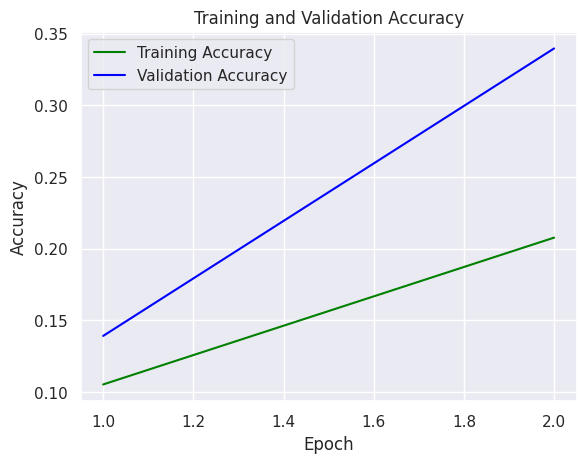

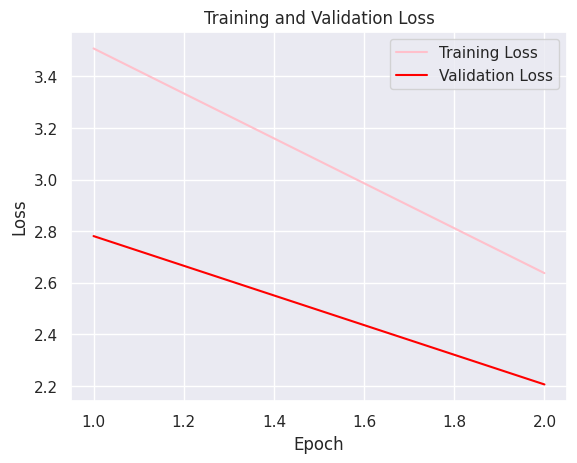

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
# Save the trained model
model.save('DCNN_model1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Building model 2- modifying the no of epochs

In [ ]:
model1 = Sequential()
model1.add(Conv2D(64, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model1.add(MaxPooling2D((2, 2)))
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dense(27, activation='softmax'))
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [ ]:
# Train the model with 5 epochs
history2=model.fit(train_generator, steps_per_epoch=200, epochs=5,
          validation_data=valid_generator, validation_steps=len(valid_generator))


Epoch 1/5
200/200 [==============================] - 132s 661ms/step - loss: 2.0491 - accuracy: 0.3833 - val_loss: 2.1533 - val_accuracy: 0.4030
Epoch 2/5
200/200 [==============================] - 127s 638ms/step - loss: 1.5934 - accuracy: 0.5077 - val_loss: 1.5022 - val_accuracy: 0.5576
Epoch 3/5
200/200 [==============================] - 132s 663ms/step - loss: 1.2840 - accuracy: 0.5906 - val_loss: 1.1628 - val_accuracy: 0.6241
Epoch 4/5
200/200 [==============================] - 127s 635ms/step - loss: 1.0939 - accuracy: 0.6470 - val_loss: 1.2821 - val_accuracy: 0.6050
Epoch 5/5
200/200 [==============================] - 132s 660ms/step - loss: 1.0423 - accuracy: 0.6725 - val_loss: 0.8375 - val_accuracy: 0.7316


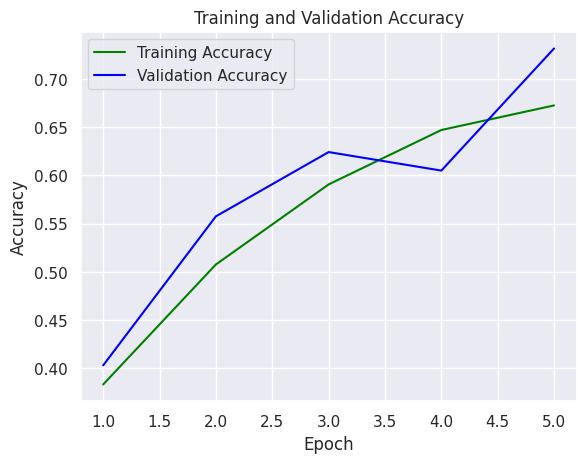

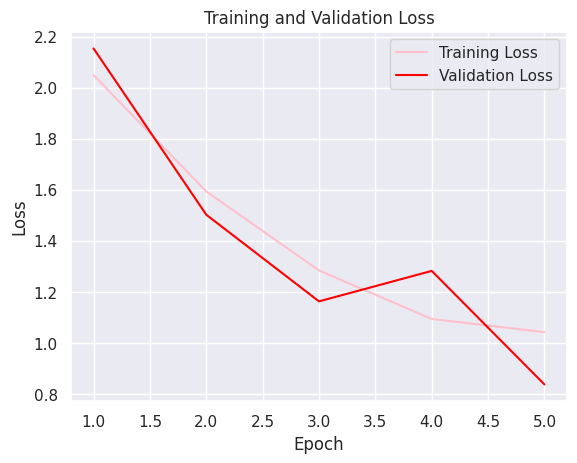

In [ ]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
model.save('DCNN_model2.h5')

### Building model 3- Modifying Architecture (Hidden Layers and Neurons, Activation Functions, Optimizer)

In [ ]:
model2 = Sequential()
model2.add(Conv2D(64, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Flatten())
model2.add(Dense(256, activation='tanh'))  # Additional hidden layer with 256 neurons and tanh activation
model2.add(Dense(27, activation='softmax'))
model2.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])  # Using SGD optimizer



In [ ]:
# Train the model with the modified architecture
history3=model2.fit(train_generator, steps_per_epoch=200, epochs=5,
          validation_data=valid_generator, validation_steps=len(valid_generator))

Epoch 1/5
200/200 [==============================] - 130s 653ms/step - loss: 3.3167 - accuracy: 0.0347 - val_loss: 3.3131 - val_accuracy: 0.0404
Epoch 2/5
200/200 [==============================] - 127s 637ms/step - loss: 3.3171 - accuracy: 0.0372 - val_loss: 3.3137 - val_accuracy: 0.0370
Epoch 3/5
200/200 [==============================] - 125s 625ms/step - loss: 3.3132 - accuracy: 0.0377 - val_loss: 3.3138 - val_accuracy: 0.0359
Epoch 4/5
200/200 [==============================] - 128s 638ms/step - loss: 3.3161 - accuracy: 0.0370 - val_loss: 3.3074 - val_accuracy: 0.0383
Epoch 5/5
200/200 [==============================] - 124s 619ms/step - loss: 3.3125 - accuracy: 0.0394 - val_loss: 3.3148 - val_accuracy: 0.0341


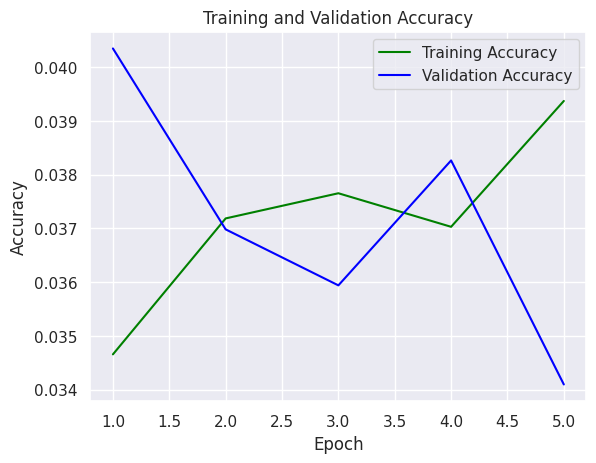

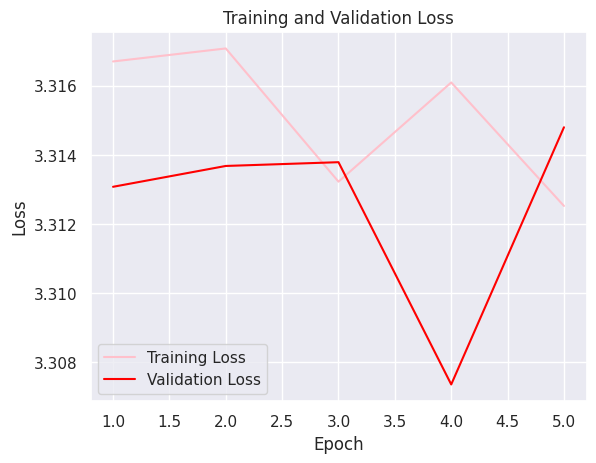

In [ ]:
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Building model 4- Adding Dropout and Data Augmentation

In [ ]:
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

# Define and compile the model with dropout layers
model3 = Sequential()
model3.add(Conv2D(64, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(MaxPooling2D((2, 2)))
model3.add(Flatten())
model3.add(Dropout(0.2))  # Dropout layer with dropout rate of 0.2
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.3))  # Another dropout layer with dropout rate of 0.3
model3.add(Dense(27, activation='softmax'))
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [ ]:
# Train the model with data augmentation and dropout
history4=model3.fit(datagen.flow(train_generator), epochs=2, verbose=1,validation_data=valid_generator, steps_per_epoch=len(train_generator), batch_size=32)


In [ ]:
acc = history4.history['accuracy']
val_acc = history4.history['val_accuracy']
loss = history4.history3['loss']
val_loss = history4.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
model.save('DCNN_model4.h5')

### INFERENCE

### Testing the best models for DCNN

In [ ]:
class_labels = class_labels = {
    0: 'Grape___Esca_(Black_Measles)',
    1: 'Corn_(maize)___Common_rust_',
    2: 'Tomato___Tomato_mosaic_virus',
    3: 'Corn_(maize)___healthy',
    4: 'Cherry_(including_sour)___Powdery_mildew',
    5: 'Potato___healthy',
    6: 'Tomato___Early_blight',
    7: 'Tomato___Septoria_leaf_spot',
    8: 'Tomato___Target_Spot',
    9: 'Tomato___Leaf_Mold',
    10: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
    11: 'Grape___Black_rot',
    12: 'Apple___Apple_scab',
    13: 'Apple___Cedar_apple_rust',
    14: 'Potato___Late_blight',
    15: 'Apple___healthy',
    16: 'Potato___Early_blight',
    17: 'Grape___healthy',
    18: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
    19: 'Apple___Black_rot',
    20: 'Tomato___Bacterial_spot',
    21: 'Tomato___Late_blight',
    22: 'Corn_(maize)___Northern_Leaf_Blight',
    23: 'Tomato___healthy',
    24: 'Cherry_(including_sour)___healthy',
    25: 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
    26: 'Tomato___Spider_mites Two-spotted_spider_mite'
}


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.preprocessing import image

1/1 [==============================] - 0s 148ms/step


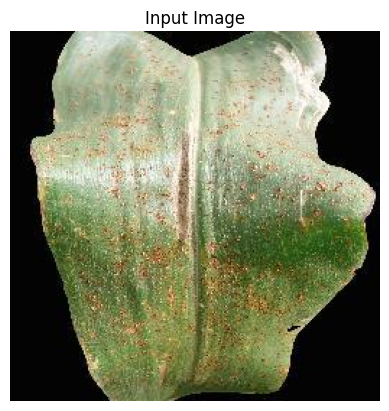

Predicted class label: Tomato___Septoria_leaf_spot


In [ ]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load the saved model
model = load_model('DCNN_model1.h5')

# Load the test image
test_image_path = '/content/drive/MyDrive/DL project/test/Corn_(maize)___Common_rust_/CornCommonRust2.JPG'

img = image.load_img(test_image_path, target_size=(256, 256))

# Preprocess the image for the model
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# Make predictions on the test image
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions, axis=1)[0]
predicted_class_label = class_labels[predicted_class_index]

# Display the input image and the predicted class label
plt.imshow(img)
plt.title('Input Image')
plt.axis('off')
plt.show()

print("Predicted class label:", predicted_class_label)

### INFERENCE:

Due to lack of computational resources, the models do not perform well on the test data. More work needs to be done for a better performance.

NOTE:

The code for accuracy, precision, F1 score, TPR, FPR and the classification matrix is in the first colab file titled Resnet 50.

However, due to the runtime error, the codes could not be exectued for both the models.